In [1]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv(r'D:\Maven Analytics\Predicting Fuel Economy/auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### OBJECTIVE 1: Prepare and Explore the Data
#### The first objective was to prepare the data for modelling, explore the target ('mpg') and other features in the dataset, and fix any issues you encounter.
##### 1. Read in the auto-mpg.csv dataset, and check datatypes and columns for missing or unusual values.


In [16]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
mpg["origin"] = mpg["origin"].astype("object")
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
mpg['horsepower'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [19]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [20]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors = "coerce")

In [21]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [22]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [23]:
mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())

In [24]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##### 2. Calculate summary statistics for each of the numeric columns in the dataset including min, max and mean, then build a histogram of the target variable (‘mpg’)

In [25]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:xlabel='mpg', ylabel='Count'>

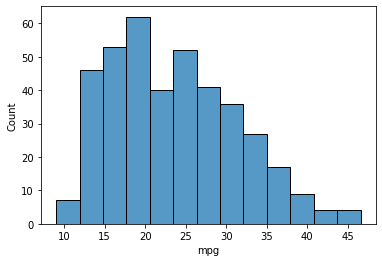

In [26]:
sns.histplot(mpg["mpg"])

##### 3. Explore relationships between the features and the ‘mpg’ column, and use scatterplots and build a correlation heatmap. Which column is most strongly correlated with ‘mpg’?

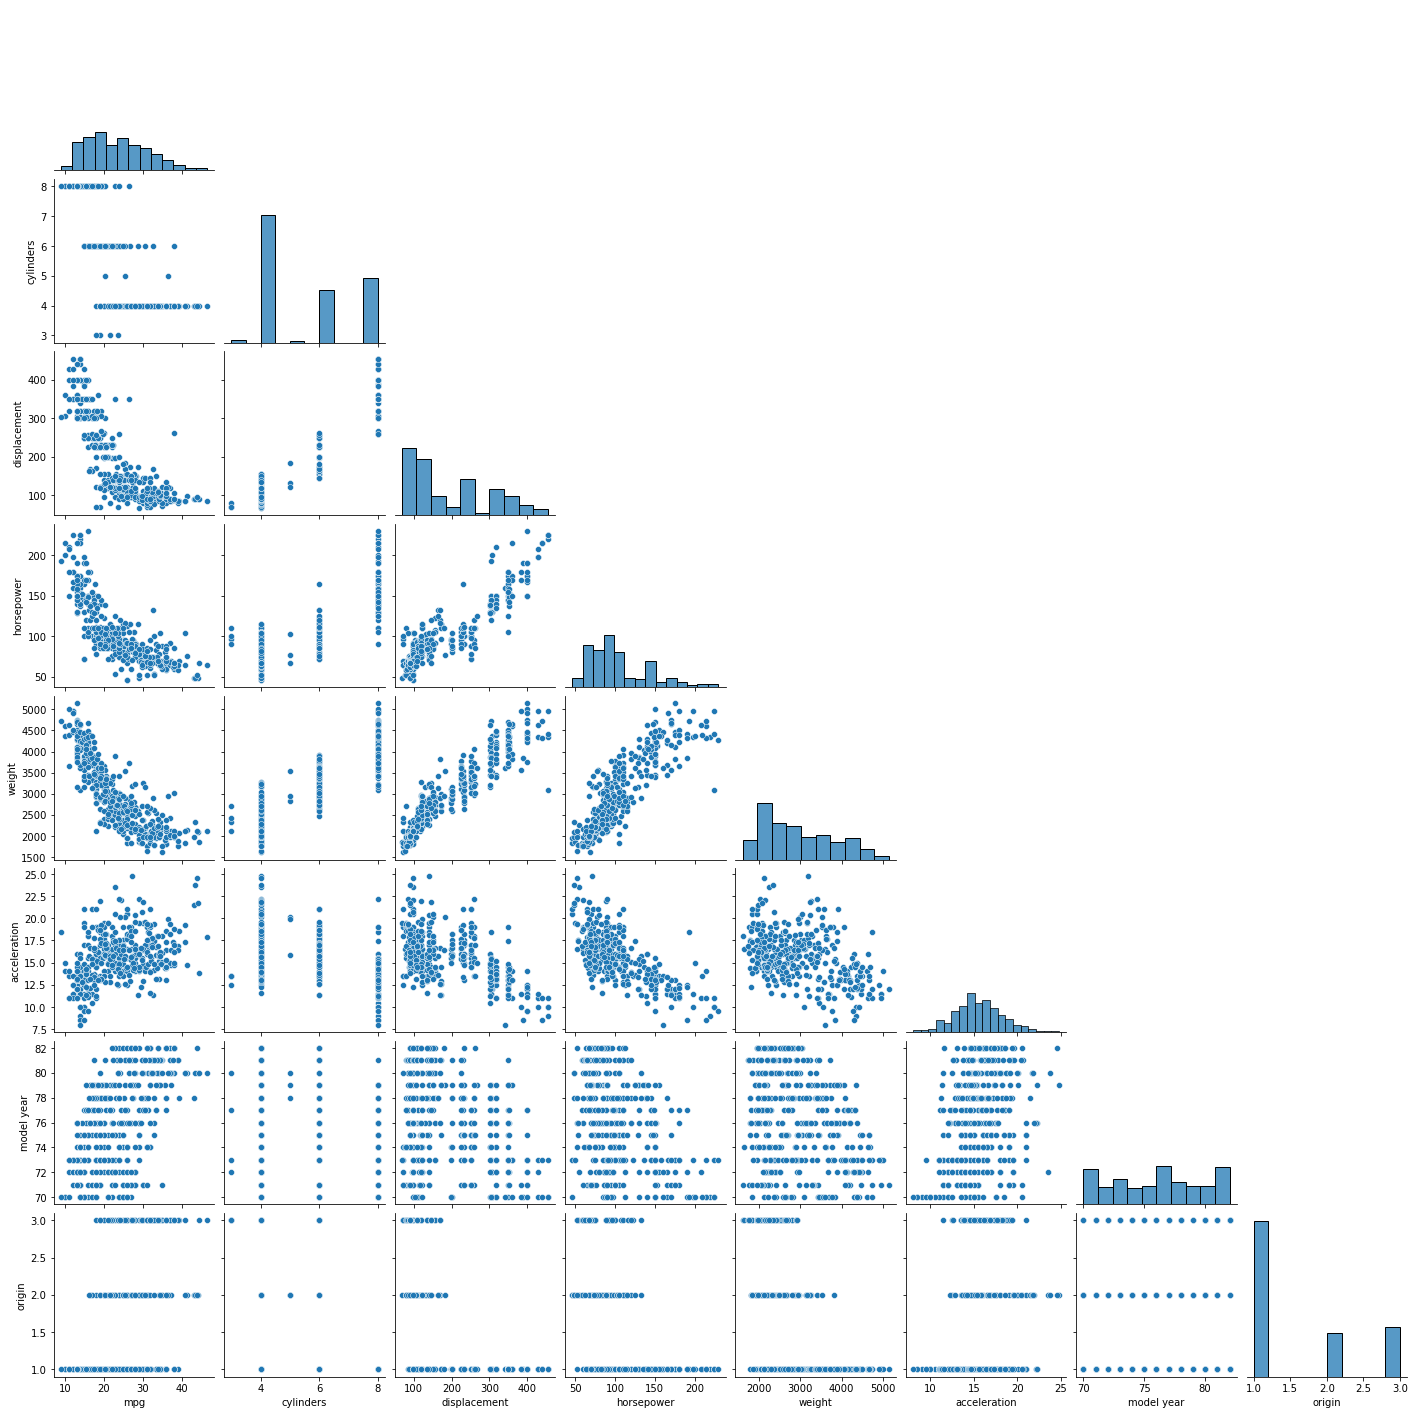

In [27]:
sns.pairplot(mpg, corner=True)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

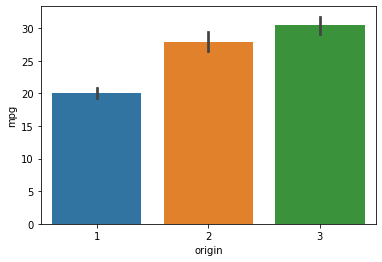

In [28]:
sns.barplot(data=mpg, x='origin', y='mpg')

In [30]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<AxesSubplot:>

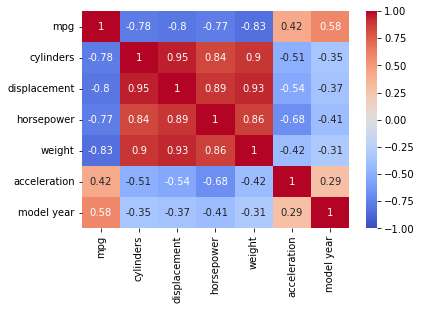

In [32]:
sns.heatmap(
    mpg.corr(),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True
)

### OBJECTIVE 2: Split the data and build a multiple regression model
#### The second objective is to split the data into training and test data, then fit a multiple regression model using the validation scheme of choice. Perform feature engineering and variable selection, and check whether any assumptions are violated.
##### 1. Split the data into train and test, then then set up a validation scheme of your choice and fit a baseline regression model using the feature with the strongest correlation to the target (‘mpg’).


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

features = ["weight"]
x = sm.add_constant(mpg[features])
y = mpg["mpg"]

x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=2023)


In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
import numpy as np

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in x and y
for train_ind, val_ind in kf.split(x,y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))
    
print("ALL Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

ALL Validation R2s:  [0.775, 0.7, 0.645, 0.603, 0.662]
Cross Val R2s: 0.677 +- 0.058
All Validation MAEs:  [2.805, 3.249, 3.498, 3.735, 3.635]
Cross Val MAEs: 3.384 +- 0.333


In [39]:
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal 0-0 Plot")

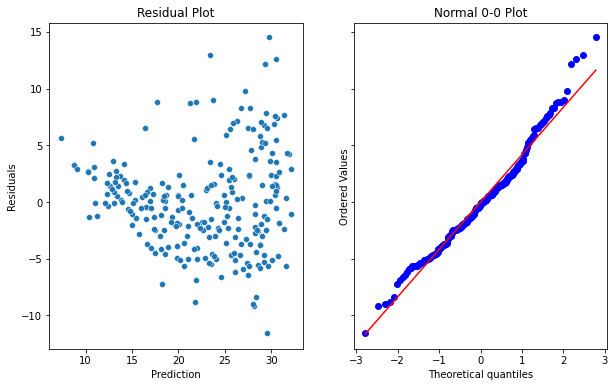

In [40]:
residual_analysis_plots(model)

##### 2. Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way.

In [43]:
mpg_model = mpg.assign(
    weight2 = mpg["weight"] ** 2).drop("car name", axis=1)

mpg_model = pd.get_dummies(mpg_model, drop_first=True)

C:\Users\Talha Shahid\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [44]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0


In [45]:
features = [
    "weight",
    "weight2",
    "cylinders",
    "displacement",
    "horsepower",
    "acceleration",
    "model year",
    "origin_2",
    "origin_3"
]

x = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]

x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=2023)


In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
import numpy as np

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in x and y
for train_ind, val_ind in kf.split(x,y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))
    
print("ALL Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

ALL Validation R2s:  [0.888, 0.846, 0.838, 0.845, 0.84]
Cross Val R2s: 0.851 +- 0.018
All Validation MAEs:  [1.814, 2.388, 2.406, 2.17, 2.387]
Cross Val MAEs: 2.233 +- 0.227


In [47]:
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal 0-0 Plot")

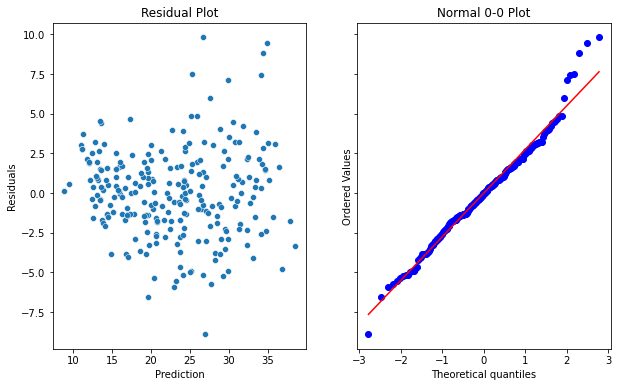

In [48]:
residual_analysis_plots(model)

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.01e-101
Time:                        15:51:49   Log-Likelihood:                -619.73
No. Observations:                 255   AIC:                             1259.
Df Residuals:                     245   BIC:                             1295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3469      5.554      0.062      0.950     -10.593      11.287
weight          -0.0206      0.002    -10.972      0.000      -0.024      -0.017
weight2       2.238e-06   2.82e-07      7.932      0.000    1.68e-06    2.79e-06
cylinders       -0.3086      0.331     -0.931      0.353      -0.961       0.344
displacement     0.0152      0.008      1.818      0.070      -0.001       0.032
horsepower      -0.0237      0.014     -1.651      0.100      -0.052       0.005
acceleration    -0.0648      0.104     -0.620      0.536      -0.270       0.141
model year       0.8498      0.054     15.639      0.000       0.743       0.957
origin_2         2.1248      0.607      3.499      0.001       0.929       3.321
origin_3         1.0057      0.630      1.596      0.112      -0.235       2.247
==============================================================================
Omnibus:                       12.558   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.244
Skew:                           0.316   Prob(JB):                     6.63e-05
Kurtosis:                       4.188   Cond. No.                     3.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          5.61e-129
Time:                        16:19:48   Log-Likelihood:                -790.69
No. Observations:                 318   AIC:                             1601.
Df Residuals:                     308   BIC:                             1639.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5478      5.158     -0.300      0.764     -11.698       8.602
weight          -0.0216      0.002    -12.305      0.000      -0.025      -0.018
weight2       2.334e-06   2.65e-07      8.796      0.000    1.81e-06    2.86e-06
cylinders       -0.2249      0.321     -0.701      0.484      -0.856       0.406
displacement     0.0165      0.008      2.105      0.036       0.001       0.032
horsepower      -0.0191      0.013     -1.442      0.150      -0.045       0.007
acceleration     0.0267      0.095      0.280      0.780      -0.161       0.214
model year       0.8669      0.051     16.905      0.000       0.766       0.968
origin_2         2.3249      0.566      4.105      0.000       1.211       3.439
origin_3         1.4970      0.577      2.592      0.010       0.361       2.633
==============================================================================
Omnibus:                       30.297   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.166
Skew:                           0.541   Prob(JB):                     3.86e-13
Kurtosis:                       4.773   Cond. No.                     3.44e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OBJECTIVE 3: Evaluate model test performance and interpret the model
#### Score your model on the test data set, use your model to predict a new batch of cars, and interpret your model results. 
###### 1. Score your final model on the test set, calculating both R2 and MAE. If your test R2 is less than 8, revisit the modelling process and interpret your model. What impact does a one-year increase in model year have on the predicted mileage?


In [51]:
print(f"Test R2: {r2(y_val, model.predict(x_val),)}")
print(f"Test MAE: {mae(y_val, model.predict(x_val),)}")

Test R2: 0.8517419345503733
Test MAE: 2.326370060168769
